In [113]:
import os

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, set_matplotlib_formats

sns.set_context('talk')

## Load .csv (output of reanalyze.py)

In [96]:
path = '/Users/cudmore/data/laura-ephys/Superior vs Inferior database_master.csv'
df = pd.read_csv(path, header=0) #, dtype={'ABF File': str})

df['Sex'] = df['condition3']
df['Region'] = df['condition4']
df['filename'] = [os.path.splitext(os.path.split(x)[1])[0] for x in df['file'].tolist()]
display(df)

,Unnamed: 0,file,condition1,condition2,condition3,condition4,spikeNumber,numError,errors,dVthreshold,...,isi_ms,spikeFreq_hz,cycleLength_pnts,cycleLength_ms,apDuration_ms,diastolicDuration_ms,widths,Sex,Region,filename
0,0,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,30,0,[],NaN,...,8556.7,0.116867,70992.0,7099.2,161.7,6933.2,"[{'halfHeight': 20, 'risingPnt': 435639, 'risi...",Male,Inferior,2020_06_30_0000
1,1,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,31,0,[],NaN,...,304.4,3.285151,3837.0,383.7,241.0,124.3,"[{'halfHeight': 20, 'risingPnt': 437409, 'risi...",Male,Inferior,2020_06_30_0000
2,2,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,32,0,[],NaN,...,306.6,3.261579,2138.0,213.8,148.2,62.0,"[{'halfHeight': 20, 'risingPnt': 441311, 'risi...",Male,Inferior,2020_06_30_0000
3,3,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,33,0,[],NaN,...,418.6,2.388915,4669.0,466.9,196.5,234.5,"[{'halfHeight': 20, 'risingPnt': 444198, 'risi...",Male,Inferior,2020_06_30_0000
4,4,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,34,0,[],NaN,...,702.2,1.424096,7351.0,735.1,229.4,500.6,"[{'halfHeight': 20, 'risingPnt': 448826, 'risi...",Male,Inferior,2020_06_30_0000
5,5,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,35,0,[],NaN,...,371.3,2.693240,3485.0,348.5,206.6,123.7,"[{'halfHeight': 20, 'risingPnt': 455987, 'risi...",Male,Inferior,2020_06_30_0000
6,6,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,36,0,[],NaN,...,368.2,2.715915,3668.0,366.8,205.2,156.7,"[{'halfHeight': 20, 'risingPnt': 460309, 'risi...",Male,Inferior,2020_06_30_0000
7,7,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,37,0,[],NaN,...,305.0,3.278689,3008.0,300.8,201.0,85.7,"[{'halfHeight': 20, 'risingPnt': 462950, 'risi...",Male,Inferior,2020_06_30_0000
8,8,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,38,0,[],NaN,...,1559.7,0.641149,15653.0,1565.3,206.6,1354.0,"[{'halfHeight': 20, 'risingPnt': 466381, 'risi...",Male,Inferior,2020_06_30_0000
9,9,/Users/cudmore/data/laura-ephys/SAN AP/2020_06...,ctrl,1,Male,Inferior,39,0,[],NaN,...,289.5,3.454231,2681.0,268.1,185.2,64.8,"[{'halfHeight': 20, 'risingPnt': 481481, 'risi...",Male,Inferior,2020_06_30_0000


## Within cell mean of any stat

In [97]:
statStr = 'spikeFreq_hz'

#print(df['filename'].unique())

print(statStr)
display(df.groupby(['Region', 'filename']).describe());

# this works too
'''
supDf = df[ df['Region']=='Superior'].groupby('filename')[statStr].describe()
print(f'Superior {statStr}')
display(supDf)

supDf = df[ df['Region']=='Inferior'].groupby('filename')[statStr].describe()
print(f'Inferior {statStr}')
display(supDf)
'''

spikeFreq_hz


Unnamed: 0                                            \
                              count         mean         std     min      25%   
Region   filename                                                               
Inferior 2020_06_30_0000       44.0    21.500000   12.845233     0.0    10.75   
         2020_07_23_0002       37.0    62.000000   10.824355    44.0    53.00   
         2020_07_23_0003      238.0   199.500000   68.848868    81.0   140.25   
Superior 2020_06_23_0006      370.0   503.500000  106.954040   319.0   411.25   
         2020_06_30_0002      134.0   755.500000   38.826537   689.0   722.25   
         2020_07_01_0002      457.0  1252.595186  367.847372   823.0   937.00   
         2020_07_16_0004        5.0  1101.000000    1.581139  1099.0  1100.00   
         2020_07_23_0000      338.0  1530.500000  346.469915  1104.0  1188.25   
         2020_07_23_0001      514.0  1651.387160  301.378807  1273.0  1401.25   

                                                  condition2             ...  \
                             50%      75%     max      count       mean  ...   
Region   filename                                                        ...   
Inferior 2020_06_30_0000    21.5    32.25    43.0       44.0   1.000000  ...   
         2020_07_23_0002    62.0    71.00    80.0       37.0   2.000000  ...   
         2020_07_23_0003   199.5   258.75   318.0      238.0   3.613445  ...   
Superior 2020_06_23_0006   503.5   595.75   688.0      370.0   5.000000  ...   
         2020_06_30_0002   755.5   788.75   822.0      134.0   6.000000  ...   
         2020_07_01_0002  1051.0  1674.00  1788.0      457.0   8.584245  ...   
         2020_07_16_0004  1101.0  1102.00  1103.0        5.0   8.000000  ...   
         2020_07_23_0000  1530.5  1872.75  1957.0      338.0  10.500000  ...   
         2020_07_23_0001  1529.5  2007.75  2136.0      514.0  11.044747  ...   

                         apDuration_ms         diastolicDuration_ms  \
                                   75%     max                count   
Region   filename                                                     
Inferior 2020_06_30_0000       253.950  4284.5                 44.0   
         2020_07_23_0002      1376.775  7068.6                 36.0   
         2020_07_23_0003       329.900  3460.6                237.0   
Superior 2020_06_23_0006       101.225  1510.0                370.0   
         2020_06_30_0002       437.650  2283.5                134.0   
         2020_07_01_0002       109.300  3031.0                457.0   
         2020_07_16_0004       219.900   351.6                  5.0   
         2020_07_23_0000       153.575   178.3                338.0   
         2020_07_23_0001       128.200   160.3                514.0   

                                                                            \
                                 mean          std    min     25%      50%   
Region   filename                                                            
Inferior 2020_06_30_0000   365.195455  1044.388546   49.3    90.5   118.55   
         2020_07_23_0002   443.722222   613.173636   66.5   128.9   199.50   
         2020_07_23_0003   445.254430   563.132801   48.2   116.9   231.10   
Superior 2020_06_23_0006   113.588649    66.652485   32.7    74.1    92.20   
         2020_06_30_0002    95.284328   108.955513   40.1    59.9    72.30   
         2020_07_01_0002    90.552516   259.446645   34.6    50.6    56.80   
         2020_07_16_0004  1158.860000   287.157741  742.4  1075.7  1145.60   
         2020_07_23_0000    64.342308     9.575830   41.9    58.1    63.90   
         2020_07_23_0001   112.247082    34.440400   53.4    90.3   102.60   

                                            
                               75%     max  
Region   filename                           
Inferior 2020_06_30_0000   197.300  6933.2  
         2020_07_23_0002   435.425  3193.5  
         2020_07_23_0003   566.600  4009.9  
Superior 2020_06_23_0006   123.

"\nsupDf = df[ df['Region']=='Superior'].groupby('filename')[statStr].describe()\nprint(f'Superior {statStr}')\ndisplay(supDf)\n\nsupDf = df[ df['Region']=='Inferior'].groupby('filename')[statStr].describe()\nprint(f'Inferior {statStr}')\ndisplay(supDf)\n"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 67.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


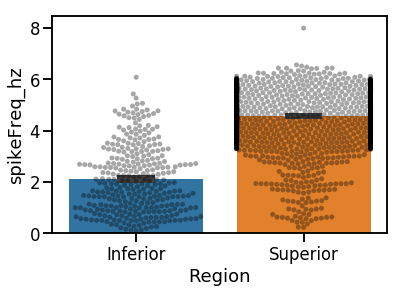

In [98]:

#sns.catplot(data=df, x='Region', y=statStr, hue='Region')

# I want to get the mean per cell and then plot

ax = sns.barplot(x="Region", y=statStr, data=df, ci=68, capsize=0.2)

sns.swarmplot(x="Region", y=statStr, data=df, color="0", alpha=.35)
#sns.stripplot(x="Region", y=statStr, data=df, color="0", alpha=.35)


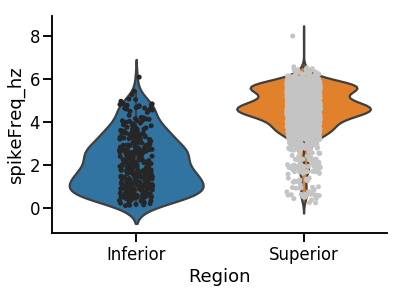

In [99]:
#sns.boxplot(x="Region", y=statStr, kind="box", data=df)

fig, ax = plt.subplots()

g = sns.violinplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                dodge=False,
                ax=ax)
g = sns.stripplot(x="Region", y=statStr,
                hue="Region",
                data=df,
                color = "0.77",
                dodge=False,
                ax=ax)
sns.despine(ax=ax)
#ax.set_ylabel("survival probability")
l = ax.legend()
#l.set_title('Whatever you want')
l.remove()

,spikeFreq_hz_mean,spikeFreq_hz_std,spikeFreq_hz_sem,spikeFreq_hz_count,Region
0,4.606427,1.123359,0.058401,370,Superior
1,2.805839,1.140580,0.098531,134,Superior
2,5.439243,0.875543,0.040956,457,Superior
3,0.733093,0.196936,0.088072,5,Superior
4,4.520101,0.213763,0.011627,338,Superior
5,4.272068,0.652933,0.028800,514,Superior
6,2.522046,1.024555,0.154458,44,Inferior
7,1.344800,0.993525,0.167936,35,Inferior
8,2.145709,1.350214,0.087706,237,Inferior


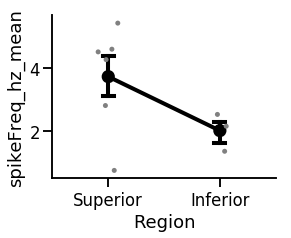

In [128]:
supDf = df [ df['Region']=='Superior' ]
newDf = supDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #.mean()
newDf['Region'] = 'Superior'
newDf.columns = [c if c=='Region' else statStr+'_'+c for c in newDf.columns.to_list()]

infDf = df [ df['Region']=='Inferior' ]
newDf2 = infDf.groupby('filename', as_index=False)[statStr].agg(['mean', 'std', 'sem', 'count']) #mean()
newDf2['Region'] = 'Inferior'
newDf2.columns = [c if c=='Region' else statStr+'_'+c for c in newDf2.columns.to_list()]

newDf = newDf.append(newDf2, ignore_index=True)

display(newDf)

fig, ax = plt.subplots(figsize=(4,3))

mStatStr = statStr + '_mean'

sns.stripplot(x='Region', y=mStatStr, data=newDf, color="0.5", ax=ax);
sns.pointplot(x='Region', y=mStatStr, data=newDf, ci=68, capsize=0.1, color='k', ax=ax)
sns.despine()


4.561824449048742 96.45695900924449


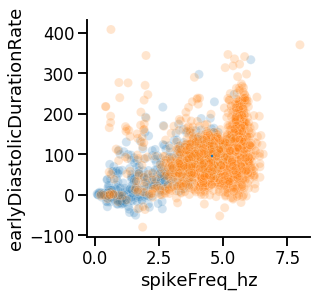

In [119]:
xStat = 'spikeFreq_hz'
yStat = 'earlyDiastolicDurationRate'

fig, ax = plt.subplots(figsize=(4,4))

sns.scatterplot(x=xStat, y=yStat, hue='Region', alpha=0.2, data=df, ax=ax)
#sns.pointplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', hue='Region', ci=68, data=df)
sns.despine()

supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

xList = supDf[xStat].tolist()
xMean = np.nanmean(xList)
xSem = scipy.stats.sem(xList)

yList = supDf[yStat].tolist()
yMean = np.nanmean(yList)
ySem = scipy.stats.sem(yList)

print(xMean, yMean)

ax.errorbar(x=xMean, y=yMean, xerr=xSem, yerr=ySem)

ax.legend().remove()

plt.show()

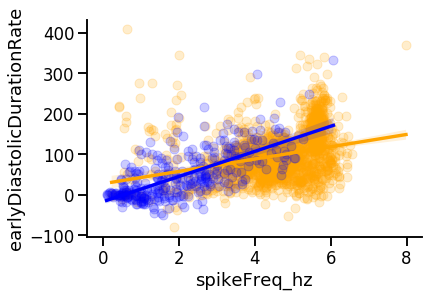

In [120]:
supDf = df [ df['Region']=='Superior' ]
infDf = df [ df['Region']=='Inferior' ]

sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='orange', data=supDf, scatter_kws={'alpha':0.2})
sns.regplot(x='spikeFreq_hz', y='earlyDiastolicDurationRate', color='blue', data=infDf, scatter_kws={'alpha':0.2})
sns.despine()

In [127]:
df.groupby('filename', as_index=False)['spikeFreq_hz','isi_ms', 'condition1'].mean()

,filename,spikeFreq_hz,isi_ms
0,2020_06_23_0006,4.606427,238.976216
1,2020_06_30_0000,2.522046,674.154545
2,2020_06_30_0002,2.805839,488.191045
3,2020_07_01_0002,5.439243,225.809190
4,2020_07_16_0004,0.733093,1429.280000
5,2020_07_23_0000,4.520101,221.726627
6,2020_07_23_0001,4.272068,240.265759
7,2020_07_23_0002,1.344800,1686.677143
8,2020_07_23_0003,2.145709,802.569198
